# **\[Predictive Analytics] Submission Akhir BMLP\_Ananta Boemi Adji**

### **Latar Belakang**

Proses penerimaan mahasiswa pascasarjana di perguruan tinggi sering kali menjadi tantangan, baik bagi calon mahasiswa maupun pihak universitas. Calon mahasiswa ingin memperkirakan peluang mereka diterima berdasarkan profil akademik dan kemampuan tes standar seperti GRE dan TOEFL. Sementara itu, universitas ingin mengoptimalkan seleksi agar dapat menerima kandidat dengan potensi terbaik.

Dengan menggunakan teknik **supervised learning**, khususnya **regression**, proyek ini bertujuan membangun model prediksi peluang diterima (Chance of Admit) berdasarkan beberapa parameter akademik dan non-akademik yang relevan. Model prediktif ini dapat membantu calon mahasiswa dalam proses pengambilan keputusan pendaftaran, serta memberikan gambaran kepada institusi pendidikan terkait faktor-faktor yang paling berpengaruh dalam penerimaan.

---

## **Tujuan Proyek**

Tujuan utama proyek ini adalah:

* Mengembangkan model machine learning untuk memprediksi probabilitas diterima (Chance of Admit) calon mahasiswa program master.
* Menganalisis dan mengidentifikasi fitur-fitur yang paling berkontribusi terhadap peluang diterima.
* Membandingkan beberapa algoritma regresi untuk menemukan model dengan akurasi terbaik.
* Memberikan insight yang berguna untuk calon mahasiswa dan institusi pendidikan.

---
## **Informasi Dataset**
Dataset saya ambil dari sumber Kaggle yang berjudul Graduate Admission 2:

Sumber: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

Link: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

## **Struktur Dataset**

Dataset yang digunakan berasal dari kumpulan data Graduate Admissions yang berisi profil akademik dan hasil tes dari calon mahasiswa, dengan target variabel adalah `Chance of Admit`. Dataset ini memiliki 500 baris dan 9 kolom, dengan rincian fitur sebagai berikut:

| Nama Kolom        | Deskripsi                                          | Tipe Data | Rentang / Contoh |
| ----------------- | -------------------------------------------------- | --------- | ---------------- |
| Serial No.        | Nomor urut data                                    | int       | 1, 2, 3, ...     |
| GRE Score         | Skor GRE (Graduate Record Examination)             | int       | 290 - 340        |
| TOEFL Score       | Skor TOEFL (Test of English as a Foreign Language) | int       | 92 - 120         |
| University Rating | Peringkat universitas (1-5)                        | int       | 1 - 5            |
| SOP               | Strength of Statement of Purpose (1-5)             | float     | 1.0 - 5.0        |
| LOR               | Strength of Letter of Recommendation (1-5)         | float     | 1.0 - 5.0        |
| CGPA              | Cumulative Grade Point Average (skala 10)          | float     | 6.8 - 9.92       |
| Research          | Pengalaman riset (0 = tidak, 1 = ya)               | int       | 0, 1             |
| Chance of Admit   | Peluang diterima program master (target variabel)  | float     | 0.34 - 0.97      |

---

## **Alur Pengerjaan Project**

Langkah-langkah pengerjaan proyek ini meliputi:

1. **Exploratory Data Analysis (EDA):**

   * Mengeksplorasi distribusi dan statistik data.
   * Visualisasi hubungan antar fitur dan target.
   * Identifikasi korelasi dan fitur penting.

2. **Preprocessing:**

   * Penanganan data yang hilang dan data duplikat (jika ada).
   * Transformasi dan normalisasi fitur numerik.
   * Encoding fitur kategorikal (jika ada).

3. **Modeling:**

   * Pemilihan algoritma regresi.
   * Pelatihan model dan tuning hyperparameter.
   * Evaluasi model dengan metrik Mean Squared Error (MSE) dan R² Score.

4. **Interpretasi dan Insight:**

   * Analisis fitur penting yang berpengaruh terhadap peluang diterima.
   * Interpretasi hasil prediksi dan rekomendasi untuk calon mahasiswa.

---

## **Penilaian yang Diharapkan**

* Memiliki eksplorasi data yang mendalam dan visualisasi yang jelas.
* Penerapan preprocessing yang tepat dan dokumentasi yang baik.
* Pemilihan dan evaluasi model yang sesuai dengan metrik yang jelas.
* Interpretasi hasil yang memberikan insight bernilai bagi pengguna.
* Penyimpanan model dan kode yang rapi serta mudah dipahami.

# **1. Import Library**

Pada tahap ini, seluruh library yang dibutuhkan untuk membangun model prediksi Graduate Admission diimpor dalam satu cell.

Library yang digunakan mencakup:
- pandas, numpy untuk eksplorasi dan manipulasi data
- matplotlib.pyplot, seaborn untuk visualisasi data dan korelasi antar fitur
- sklearn (scikit-learn) untuk preprocessing data, pelatihan model regresi, serta evaluasi performa model
- joblib untuk menyimpan model hasil pelatihan agar dapat digunakan kembali di masa mendatang

In [24]:
!pip install -q gdown

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# **2. Load Dataset**

Dataset dimuat dari Google Drive menggunakan link share ID, dataset saya download langsung dari kaggle dan menggunakan dataset yang berisikan 501 baris data. Kemudian menampilkan 5 baris pertama untuk melihat struktur datanya.

In [25]:
url = 'https://drive.google.com/uc?id=1DnaAgTCu6lseG6YF4IeoHbZVAU6PQPe_'
df = pd.read_csv(url)

df.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **3. Exploratory Data Analysis (EDA)**

Pengecekan informasi umum terkait dataset yang digunakan seperti ukuran, tipe data, dan memastikan tidak ada data yang kosong atau tidak relevan.

In [26]:
print(f"Jumlah baris dan kolom: {df.shape}")
df.info()
df.describe()

Jumlah baris dan kolom: (500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Insight**: Dataset ini terdiri dari 500 data mahasiswa tanpa missing value atau duplikasi, dengan nilai GRE, TOEFL, CGPA, dan faktor lainnya yang relatif terdistribusi baik; nilai *Chance of Admit* rata-rata 0.72 menunjukkan bahwa sebagian besar kandidat memiliki peluang cukup tinggi untuk diterima.

**Pengecekan Missing value & Duplikasi Dataset**

In [27]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

**Insight**: Dari hasil menunjukkan bahwa dataset yang digunakan tidak memiliki adanya data yang kosong ataupun data yang terduplikasi.

**Pengecekan matriks korelasi antar variabel**, bagaimana pemetaan bagaimana korelasi yang memiliki tingkat tertinggi dari semua variabel yang ada dari dataset

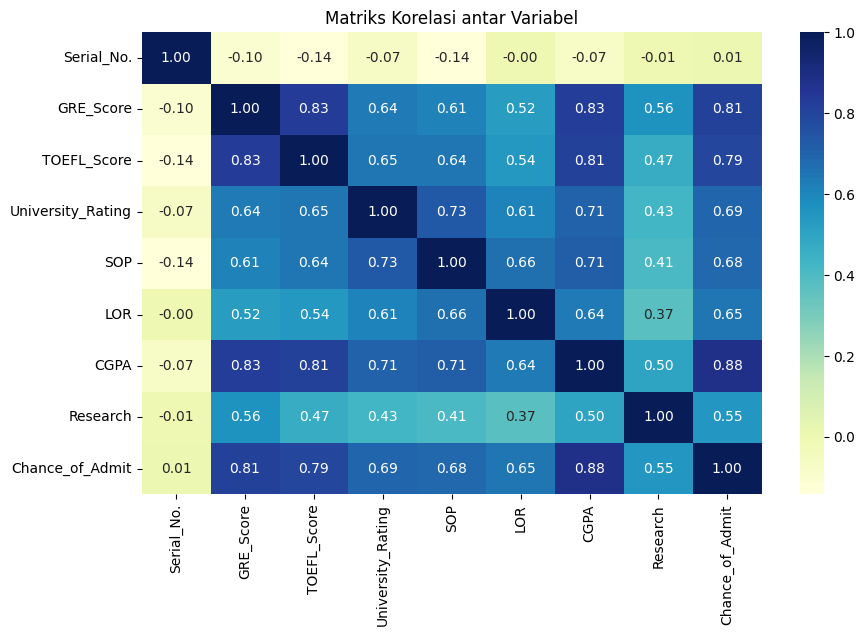

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matriks Korelasi antar Variabel")
plt.show()

**Insight**: Berdasarkan hasil matriks korelasi, variabel yang paling berpengaruh terhadap Chance of Admit adalah CGPA dengan korelasi tinggi sebesar 0.88, diikuti oleh GRE Score (0.81) dan TOEFL Score (0.79). Hal ini menunjukkan bahwa performa akademik secara keseluruhan memiliki pengaruh besar terhadap peluang diterima. Sementara itu, faktor seperti Research (0.55) dan SOP (0.68) juga berkontribusi namun tidak sekuat nilai akademik. Variabel Serial No. hampir tidak memiliki korelasi, sehingga tidak relevan untuk prediksi. Analisis ini menunjukkan bahwa variabel akademik lebih dominan dalam memengaruhi hasil penerimaan.

**Visualisasi Distribusi Fitur-Fitur Utama dari Datset**

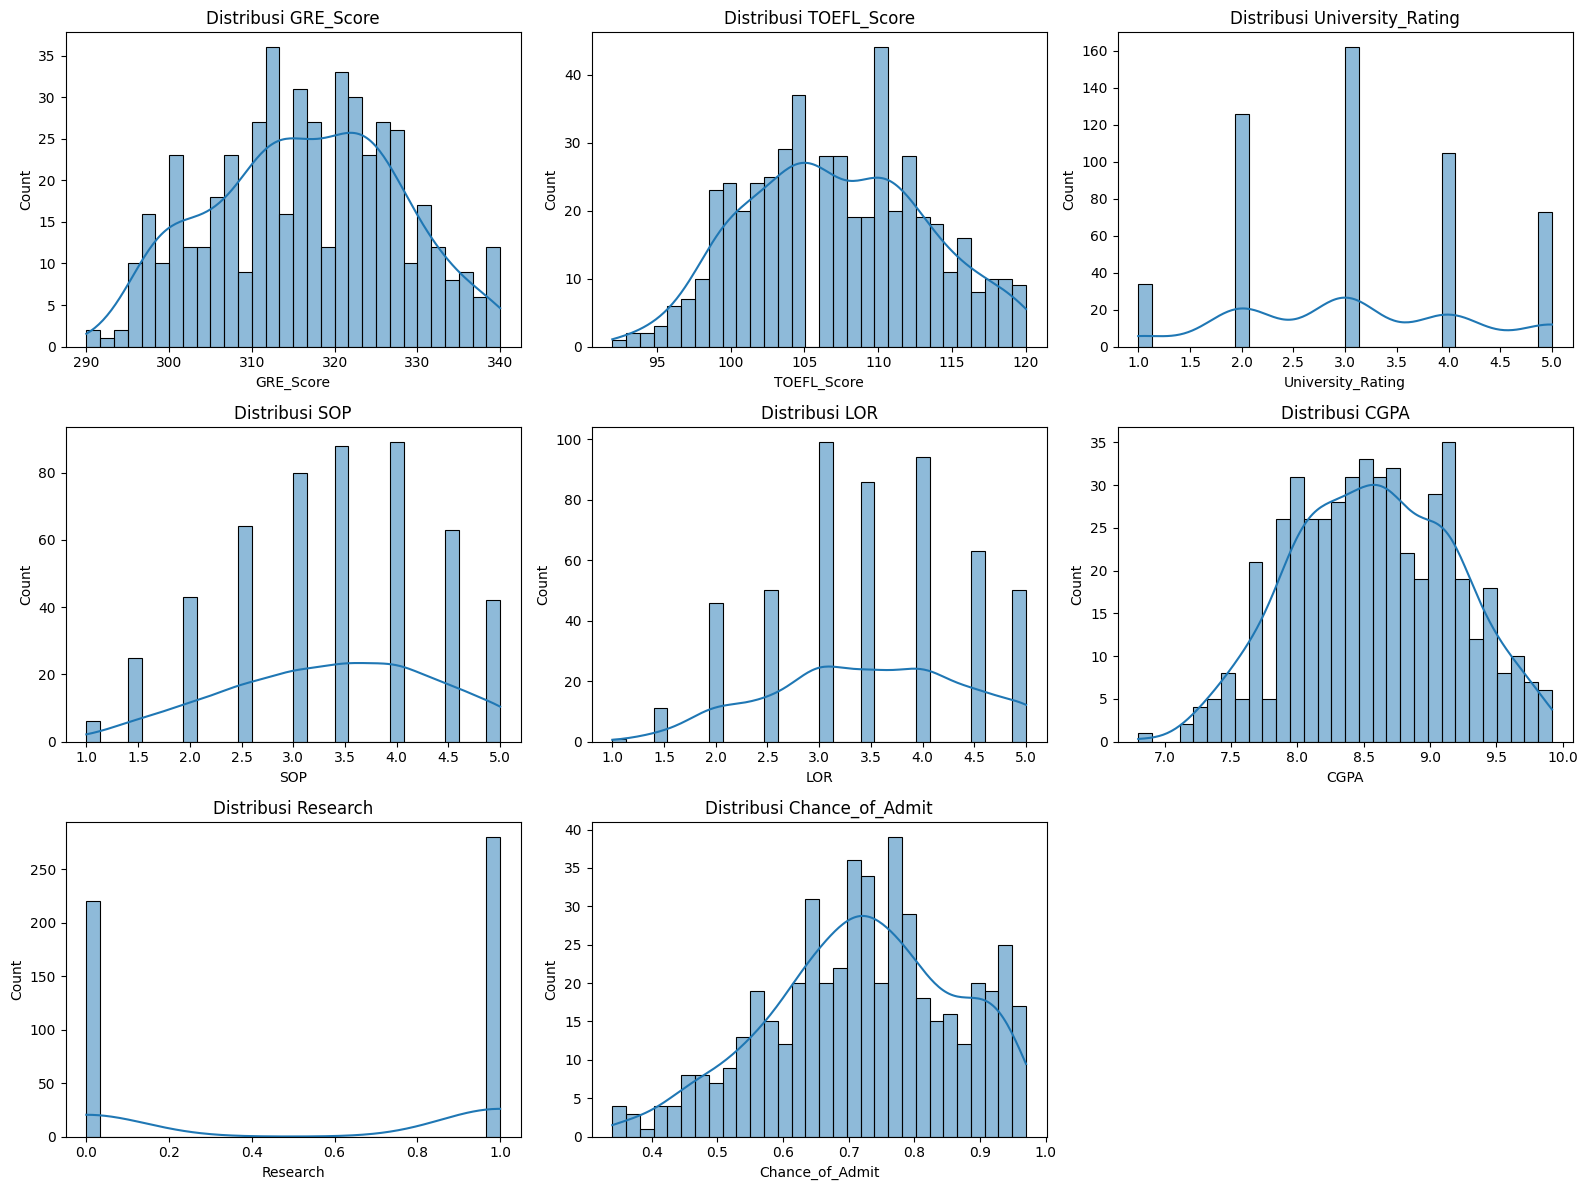

In [29]:
numerik_cols = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

plt.figure(figsize=(16,12))
for i, col in enumerate(numerik_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**Insight**: Sebagian besar fitur numerik seperti GRE Score, TOEFL Score, dan CGPA menunjukkan distribusi mendekati normal (bell-shaped), menandakan bahwa data tersebar relatif seimbang di sekitar nilai rata-rata.

---

Fitur seperti SOP dan LOR terlihat memiliki distribusi yang lebih menyebar secara seragam namun dengan beberapa lonjakan di titik tertentu, yang bisa jadi disebabkan oleh pembulatan atau skala penilaian.

---

Fitur University Rating bersifat diskrit dan memiliki sebaran data yang tidak merata—banyak nilai terkonsentrasi pada rating tertentu.

---

Research, distribusinya tidak merata dan bersifat biner (0 atau 1), menandakan apakah kandidat memiliki pengalaman riset atau tidak.

---

Terakhir, Chance of Admit menunjukkan distribusi miring ke kiri (left-skewed), yang menunjukkan lebih banyak kandidat dengan peluang diterima yang cukup tinggi di atas 0.7. Pola-pola ini dapat menjadi pertimbangan penting dalam pemodelan, terutama saat memilih algoritma dan melakukan normalisasi.

**Boxplot untuk deteksi Outlier**

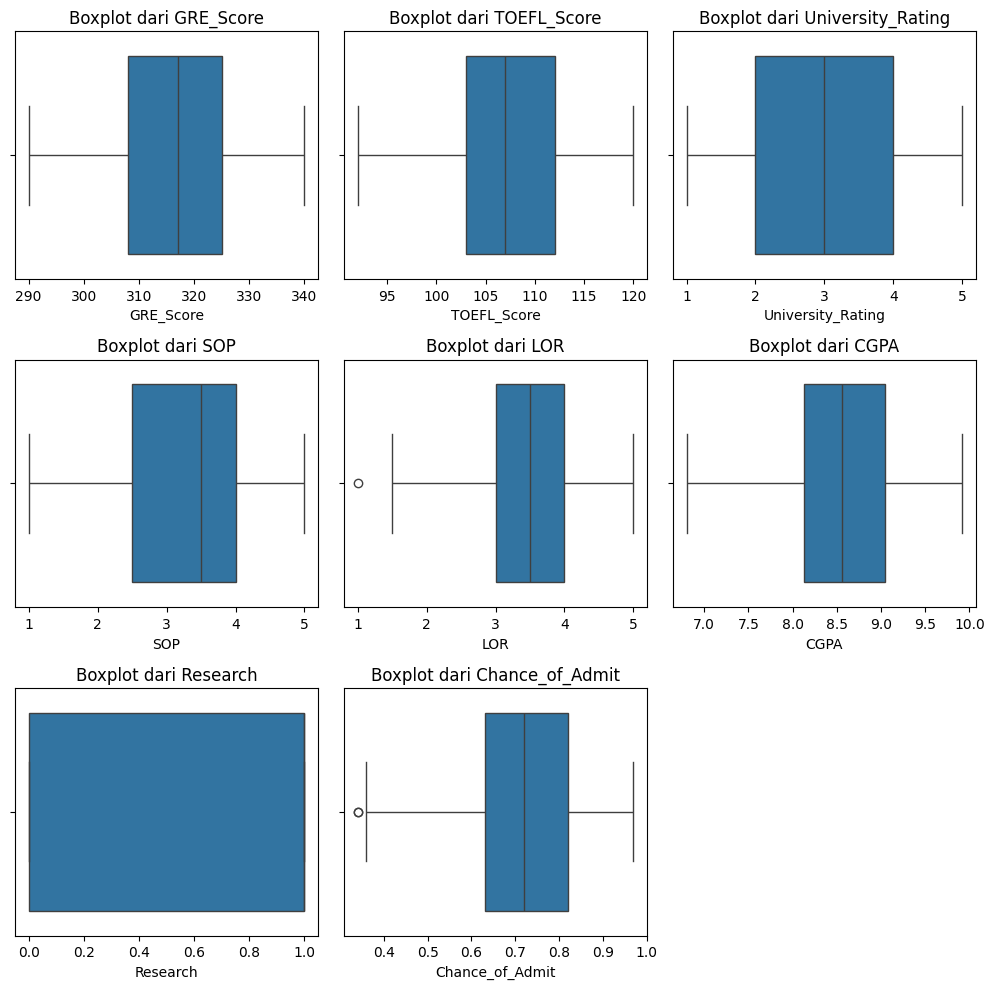

In [30]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(numerik_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot dari {col}')
plt.tight_layout()
plt.show()

**Insight**:

Fitur yang memiliki outlier:
1. LOR (Letter of Recommendation):
- Terlihat ada satu outlier di bawah nilai minimum.
- Meskipun hanya satu, ini bisa menjadi pertimbangan apakah data tersebut valid atau salah input.

2. Chance of Admit:
- Terlihat ada satu outlier di bawah (sekitar nilai 0.4).
- Mungkin masih wajar tergantung konteksnya (misalnya nilai GRE dan CGPA yang sangat rendah)

---

Fitur yang Tidak Menunjukkan Outlier:

**GRE Score, TOEFL Score, SOP, CGPA, University Rating**
→ Semua fitur ini memiliki distribusi yang relatif simetris dan tidak menunjukkan nilai ekstrem di luar batas whisker.

Research:
Tidak terdapat outlier karena Research adalah variabel biner (0 atau 1). Distribusinya memang hanya dua nilai saja.

---

Tidak perlu melakukan penghapusan atau modifikasi outlier pada dataset ini.
Outlier sedikit dan termasuk valid, clustering juga cukup robust terhadap outlier minor seperti ini.

# **4. Preprocessing / Data Preparation**

**Drop kolom tidak relevan**

Disini saya akan melakukan drop pada kolom `Serial No.` karena kolom ini tidak memberikan informasi yang relevan untuk modeling kedepannya, sehingga akan saya hapus.

In [31]:
df = df.drop(columns=['Serial_No.'])
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Feature Scaling (Standardization)**

Karena fitur memiliki skala berbeda-beda (misal GRE 0-340, CGPA 0-10, SOP 1-5), perlu dilakukan standardisasi supaya model tidak bias terhadap fitur dengan nilai besar.

In [32]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Chance_of_Admit']))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Chance_of_Admit'] = df['Chance_of_Admit']

**Memisahkan bagian fitur dan juga target**

Fitur (X): Semua kolom yang akan digunakan sebagai input untuk memprediksi, yaitu data yang menjelaskan karakteristik kandidat mahasiswa (misalnya GRE Score, TOEFL Score, CGPA, dll).

Target (y): Kolom yang ingin diprediksi, yaitu Chance_of_Admit yang menunjukkan probabilitas diterimanya kandidat.

In [33]:
X = df_scaled.drop(columns=['Chance_of_Admit'])
y = df_scaled['Chance_of_Admit']

**Split data menjadi train dan test**

Agar evaluasi model nanti valid, pisahkan data menjadi data latih dan data uji yaitu 80:20. dan juga menggunakan random_state agar hasil pembagian data konsisten di setiap run.

In [34]:
X = df_scaled.drop(columns=['Chance_of_Admit'])
y = df_scaled['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Pengecekan jumlah kolom dan baris setelah melakukan Preprocessing Data**

In [45]:
print(f"Jumlah baris dan kolom: {df.shape}")
df.info()
df.describe()

Jumlah baris dan kolom: (500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Insight**: Dataset yang digunakan memiliki jumlah 500 baris dan juga 8 kolom

# **5. Modeling**

Pada bagian ini saya akan mentraining beberapa model dan mengevaluasi hasil dari masing-masing model tersebut untuk menentukan model mana yang memiliki hasil terbaik secara keseluruhannya.

Pada project ini saya akan menggunakan beberapa algoritma yaitu:
1. **Linear Regression**: Karena merupakan model dasar yang sederhana, cepat, dan mudah diinterpretasikan. Cocok untuk mengetahui hubungan linier antara fitur dan target (Chance of Admit), serta sebagai baseline untuk dibandingkan dengan model lainnya.

2. **Random Forest Regressor**: karena model berbasis ensemble yang dapat menangani hubungan non-linear, tahan terhadap overfitting, dan bekerja baik meskipun terdapat fitur yang kurang relevan.

3. **Gradient Boosting Regressor**: mampu memodelkan hubungan kompleks dan meningkatkan performa melalui pendekatan boosting. Model ini sering memberikan hasil yang kompetitif dalam berbagai tugas regresi.


## 1. **Linear Regresssion**

Pembangunan model dengan nama `lr_model`

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

**Evaluasi hasil hasil dari model Linear Regression**

Hasil ini nantinya akan dibandingkan dengan model-model lainnya dan akan dievaluasi manakah yang memiliki hasil yang terbaik

In [36]:
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Evaluation:
Mean Squared Error (MSE): 0.0037
Root Mean Squared Error (RMSE): 0.0609
Mean Absolute Error (MAE): 0.0427
R² Score: 0.8188


##2. **Random Forest Regressor**

Pembangunan model dengan nama `rf_model`

In [37]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.0043
Root Mean Squared Error (RMSE): 0.0654
Mean Absolute Error (MAE): 0.0437
R² Score: 0.7908


##3. **Gradient Boosting Regressor**

Pembangunan model dengan nama `gbr_model`

In [39]:
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [40]:
y_pred_gbr = gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"R² Score: {r2_gbr:.4f}")

Gradient Boosting Regressor Evaluation:
Mean Squared Error (MSE): 0.0044
Root Mean Squared Error (RMSE): 0.0667
Mean Absolute Error (MAE): 0.0462
R² Score: 0.7826


# **6. Evaluation performa semua Model**

Melakukan pengecekan bagaimana performa dari ketida model yang telah dibuat sebelum melakukan proses cross validation dan juga Hyperparameter Tuning.

**Metrik Evaluasi**

Dalam proyek ini digunakan beberapa metrik regresi untuk mengevaluasi kinerja model:

- **Mean Absolute Error (MAE)**  
  \[
  MAE = $\frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|\
  $\]
  
  Mengukur seberapa jauh prediksi dari nilai aktual secara rata-rata dalam satuan absolut.

- **Mean Squared Error (MSE)**  
  \[
  MSE = $\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $\]  

  Memberi penalti lebih besar pada kesalahan besar.

- **R-squared (R² Score)**  
  \[
  R^2 = $1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$
  \]  

  Mengukur proporsi variansi target yang dapat dijelaskan oleh fitur input. Semakin mendekati 1, semakin baik.

In [41]:
model_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lr, mse_rf, mse_gbr],
    'RMSE': [rmse_lr, rmse_rf, rmse_gbr],
    'MAE': [mae_lr, mae_rf, mae_gbr],
    'R2': [r2_lr, r2_rf, r2_gbr]
})

display(model_scores)

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,0.003705,0.060866,0.042723,0.818843
1,Random Forest,0.004278,0.065410,0.043703,0.790787
2,Gradient Boosting,0.004446,0.066679,0.046205,0.782584


**Insight**

1. **Linear Regression Insight**

* **Mean Squared Error (MSE)**: `0.0037`
  → Error kuadrat rata-rata tergolong rendah.
* **Root Mean Squared Error (RMSE)**: `0.0609`
  → Prediksi rata-rata meleset sekitar `0.06` dari nilai sebenarnya.
* **Mean Absolute Error (MAE)**: `0.0427`
  → Rata-rata deviasi absolut dari prediksi ke nilai aktual sekitar `0.043`.
* **R² Score**: `0.8188`
  → Model ini mampu menjelaskan sekitar `81.88%` variasi pada target (`Chance_of_Admit`).

**Kesimpulan**:
Linear Regression menunjukkan performa terbaik sejauh ini, dengan **nilai R² tertinggi** dan **error terkecil** di antara semua model yang diuji.

---

2. **Random Forest Regressor Insight**

* **Mean Squared Error (MSE)**: `0.0043`
  → Lebih tinggi dari Linear Regression, menandakan prediksi sedikit kurang akurat.
* **Root Mean Squared Error (RMSE)**: `0.0654`
  → Prediksi rata-rata meleset sekitar `0.065` dari nilai sebenarnya.
* **Mean Absolute Error (MAE)**: `0.0437`
  → Deviasi absolut rata-rata dari prediksi ke aktual sekitar `0.044`.
* **R² Score**: `0.7908`
  → Model menjelaskan sekitar `79.08%` variasi pada `Chance_of_Admit`.

**Kesimpulan**:
Random Forest menunjukkan performa yang baik, namun masih **di bawah Linear Regression**. Kemungkinan hubungan antara fitur dan target cukup linear sehingga model linier lebih unggul.

---

3. **Gradient Boosting Regressor Insight**

* **Mean Squared Error (MSE)**: `0.0044`
* **Root Mean Squared Error (RMSE)**: `0.0667`
* **Mean Absolute Error (MAE)**: `0.0462`
* **R² Score**: `0.7826`

**Kesimpulan**:
Gradient Boosting memiliki performa paling rendah dibanding dua model sebelumnya, dengan **R² Score dan MAE tertinggi** (terburuk). Pada dataset ini model **tidak mengungguli Linear Regression**.

---

**Kesimpulan Sementara dari Ketiga Model**

Linear Regression adalah **model terbaik sejauh ini**, berdasarkan evaluasi metrik yang menunjukkan **error terkecil** dan **kemampuan menjelaskan variansi tertinggi (R²)**. Model ini cocok digunakan kecuali hasil tuning atau cross validation dari model lain menunjukkan peningkatan yang signifikan.

# **7. Cross-Validation dan Hyperparameter Tuning**

Mengecek apakah model konsisten performanya di berbagai subset data dan mencari kombinasi parameter terbaik untuk meningkatkan performa. **Beberapa langkah yang akan dilakukan adalah sebagai berikut ini**:

**Cross-Validation**

Gunakan `cross_val_score` dengan **5-fold** cross-validation untuk:

* `LinearRegression`
* `RandomForestRegressor`
* `GradientBoostingRegressor`

Evaluasi metrik: **R² Score**

2. **Hyperparameter Tuning (1 model tree-based)**

Kita akan gunakan `GridSearchCV` untuk tuning:

* `RandomForestRegressor`

## 1. Cross Validation

Mengecek apakah model stabil pada berbagai subset data, disini saya melakukan 5-Fold Cross-Validation pada ketiga model utama.

In [42]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

print("Cross-Validation (R² Score):")

models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} | R² Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

Cross-Validation (R² Score):
Linear Regression | R² Mean: 0.8108, Std: 0.0756
Random Forest | R² Mean: 0.7743, Std: 0.0789
Gradient Boosting | R² Mean: 0.7825, Std: 0.0880


**Cross-Validation Insight:**

Hasil cross-validation menunjukkan bahwa Linear Regression memiliki performa paling stabil dan akurat dengan R² Mean sebesar 0.8108, lebih tinggi dibanding Random Forest (0.7743) dan Gradient Boosting (0.7825). Ini memperkuat bahwa hubungan antara fitur dan target bersifat cukup linear.

## 2. Hyperparameter

Dilakukan tuning pada Random Forest menggunakan Grid Search. Parameter terbaik ditemukan dengan kombinasi jumlah pohon (n_estimators), kedalaman maksimal (max_depth), dan minimum jumlah sample split (min_samples_split).

In [43]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X, y)

print("\nBest Parameters (Random Forest):", grid_search.best_params_)
print(f"Best Cross-Validated R² Score: {grid_search.best_score_:.4f}")


Best Parameters (Random Forest): {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validated R² Score: 0.7863


**Hyperparameter Tuning Insight:**

Setelah dilakukan tuning pada **Random Forest**, kombinasi parameter terbaik ditemukan pada `max_depth=5`, `min_samples_split=5`, dan `n_estimators=50`, menghasilkan R² Score sebesar **0.7863**. Meskipun ada peningkatan dibanding versi default, performanya masih sedikit di bawah Linear Regression.

# **8. Evaluation and Project Summary**

Linear Regression | R² Mean: 0.8108, Std: 0.0756
Random Forest | R² Mean: 0.7743, Std: 0.0789
Gradient Boosting | R² Mean: 0.7825, Std: 0.0880


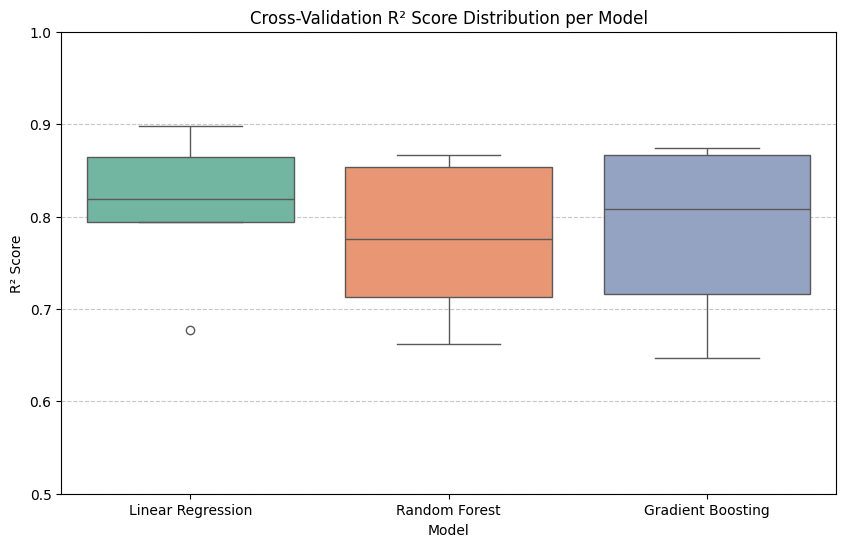

Best Parameters (Random Forest): {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validated R² Score after tuning: 0.7863


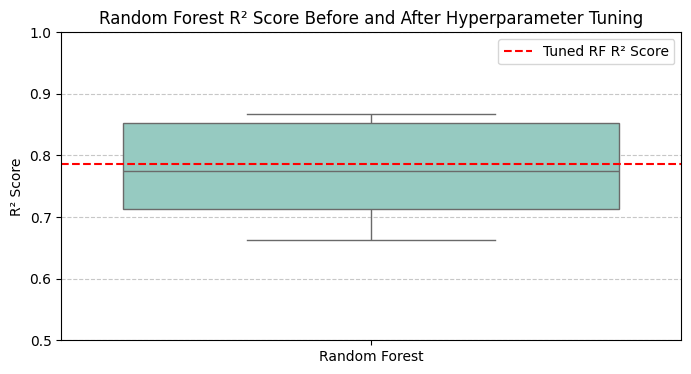

In [44]:
models = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_results[name] = scores
    print(f"{name} | R² Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

plt.figure(figsize=(10,6))
sns.boxplot(data=[cv_results[m] for m in models.keys()],
            orient='v',
            palette="Set2")
plt.xticks(np.arange(len(models)), list(models.keys()))
plt.title('Cross-Validation R² Score Distribution per Model')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters (Random Forest): {best_params}")
print(f"Best Cross-Validated R² Score after tuning: {best_score:.4f}")

plt.figure(figsize=(8,4))
sns.boxplot(data=[cv_results["Random Forest"]], orient='v', palette="Set3")
plt.axhline(y=best_score, color='r', linestyle='--', label='Tuned RF R² Score')
plt.title('Random Forest R² Score Before and After Hyperparameter Tuning')
plt.ylabel('R² Score')
plt.xticks([0], ['Random Forest'])
plt.legend()
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Kesimpulan Akhir**

Proyek ini bertujuan membangun model prediksi peluang diterima kuliah (Chance of Admit) berdasarkan sejumlah fitur akademik dan non-akademik seperti GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, dan pengalaman riset. Tahapan utama proyek meliputi eksplorasi data (EDA), persiapan data (preprocessing dan standarisasi), pembangunan dan evaluasi beberapa model regresi, serta cross-validation dan hyperparameter tuning untuk meningkatkan performa model.

---

**Tahapan pengerjaan project**

1. **Eksplorasi Data (EDA)**

   * Tidak ditemukan *missing values*.
   * Outlier minor terdeteksi pada fitur *LOR* dan *Chance of Admit*, namun masih wajar secara konteks.

2. **Data Preparation**

   * Penghapusan kolom `Serial_No.`
   * Standarisasi fitur dengan `StandardScaler`.

3. **Modeling**

   * Tiga model diuji:

     * **Linear Regression**
     * **Random Forest Regressor**
     * **Gradient Boosting Regressor**

4. **Evaluasi Model**

   * Metode evaluasi: MSE, RMSE, MAE, R² Score
   * **Linear Regression** memberikan hasil terbaik:

     * R² Score: **0.8188**
     * RMSE: **0.0609**
     * MAE: **0.0427**

5. **Cross-Validation dan Hyperparameter Tuning**

   * Linear Regression memiliki performa konsisten (R² Mean: 0.8108).
   * Tuning pada Random Forest meningkatkan skor (R²: 0.7863), tetapi tetap di bawah Linear Regression.

---

✅ **Kesimpulan** ✅

Model Linear Regression dipilih sebagai model akhir karena:

- Memiliki akurasi tertinggi (R² tertinggi dan error terendah)
- Konsisten dalam cross-validation
- Sederhana dan mudah diinterpretasikan

---

**Potensi Perbaikan dan Pengembangan ke Depan**

Untuk pengembangan selanjutnya, beberapa hal dapat dipertimbangkan agar performa model lebih optimal, antara lain:

* Menggunakan dataset yang lebih besar dan beragam untuk meningkatkan generalisasi model.
* Menambahkan fitur baru yang relevan, seperti latar belakang pendidikan, aktivitas ekstrakurikuler, atau data psikometrik.
* Mencoba model-model yang lebih kompleks seperti XGBoost, LightGBM, atau model berbasis neural networks.
* Melakukan teknik feature engineering dan seleksi fitur yang lebih mendalam untuk memperbaiki kualitas input model.
* Mengimplementasikan pipeline end-to-end otomatis dari preprocessing sampai deployment model untuk memudahkan penggunaan di aplikasi nyata.

Secara keseluruhan, proyek ini berhasil memenuhi tujuan utama yaitu membangun model prediksi peluang diterima kuliah dengan performa yang baik dan analisis mendalam. Model yang dihasilkan dapat digunakan sebagai dasar sistem rekomendasi penerimaan mahasiswa atau sebagai bahan pengembangan riset lanjutan.

### **Referensi**

Beberapa referensi relevan yang digunakan dalam penyusunan proyek ini:

[1] Ismail, A., & Elnagar, A. (2021). Graduate Admission Prediction Using Machine Learning. ResearchGate. https://www.researchgate.net/publication/348433004_Graduate_Admission_Prediction_Using_Machine_Learning

[2] Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019, Kaggle: https://www.kaggle.com/mohansacharya/graduate-admissions

[3] Scikit-learn documentation: https://scikit-learn.org/stable/supervised_learning.html